In [1]:
##Importing Modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tifffile as tf
import rasterio as rio
import os
from os import path as path

In [3]:
##Getting stamp names
def get_stamp_names(icepipe_folder):
    with open(path.join(icepipe_folder,'stampNames.txt')) as f:
        stamp_names = f.readlines()
        stamp_names = [i[:-2] for i in stamp_names]
    return stamp_names

In [4]:
##Loading water locations
ice_pipe_folder = 'D:/Data/Ice_Pipeline_Out_6-8-23'
stamp_names = get_stamp_names(ice_pipe_folder)
wloc_dirpath = path.join(ice_pipe_folder,'water_locations')
wloc_filenames = os.listdir(wloc_dirpath)
wloc_dict = {}
for filename,stampname in zip(wloc_filenames,stamp_names):
    df = pd.read_csv(path.join(wloc_dirpath,filename))
    wloc_dict.update({stampname:df})

print(len(wloc_dict))

99


43.99053 -1.2050562


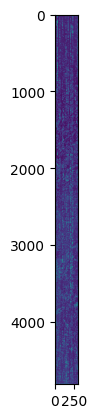

In [11]:
##Plotting raw water locations
loaded_names = list(wloc_dict.keys())
loaded_names = [f'{i}_smooth.tif' for i in loaded_names]
smooth_dirpath = path.join(ice_pipe_folder,'rfl_smooth')
og_dirpath = path.join(ice_pipe_folder,'rfl_cropped')
smooth_names = os.listdir(smooth_dirpath)
og_names = os.listdir(og_dirpath)
if loaded_names==smooth_names:
    pass
else:
    raise ValueError('Lists are not the same!')

for n in range(1,len(wloc_dict)):
    watloc = list(wloc_dict.values())[n]
    im = tf.imread(path.join(smooth_dirpath,smooth_names[n]))
    x,y = np.array(watloc.iloc[:,-2]).astype(int),np.array(watloc.iloc[:,-1]).astype(int)
    print(im.max(),im.min())
    im[x,y] = 20
    break

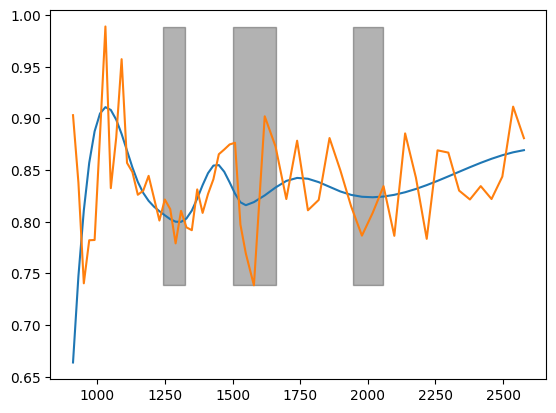

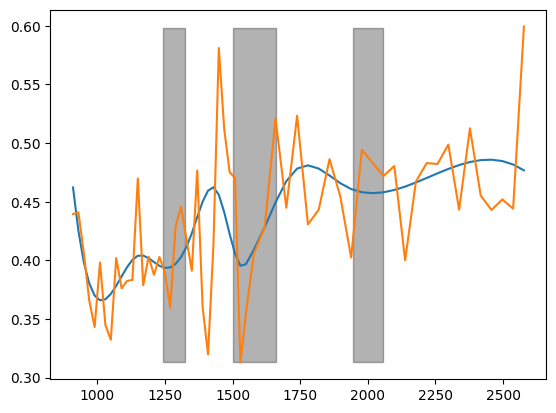

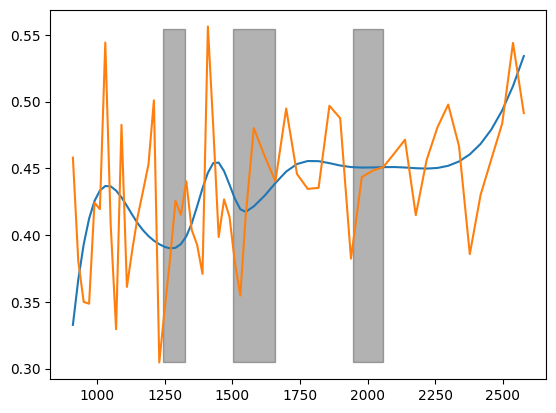

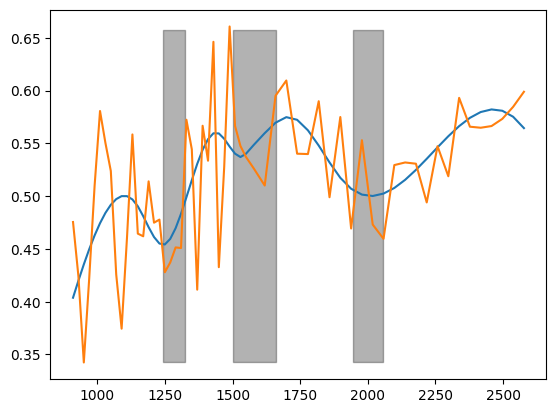

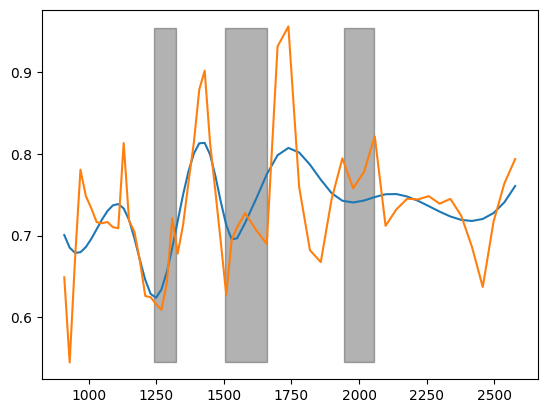

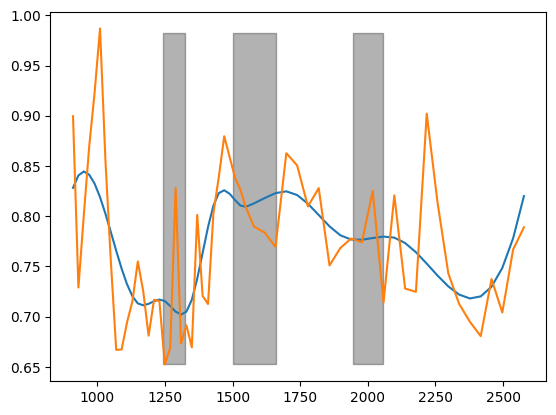

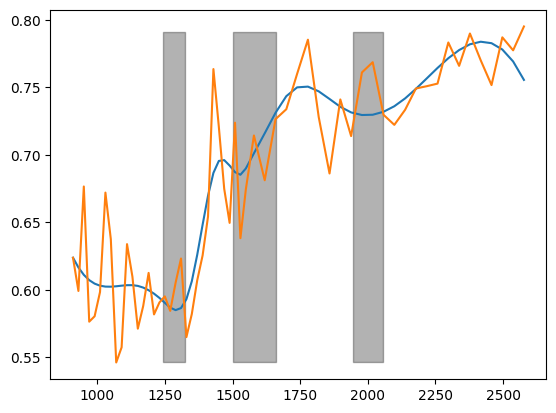

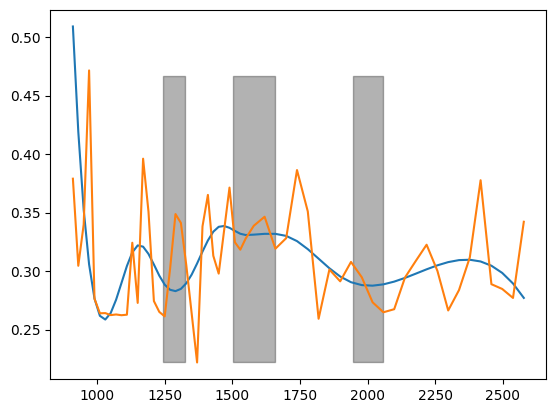

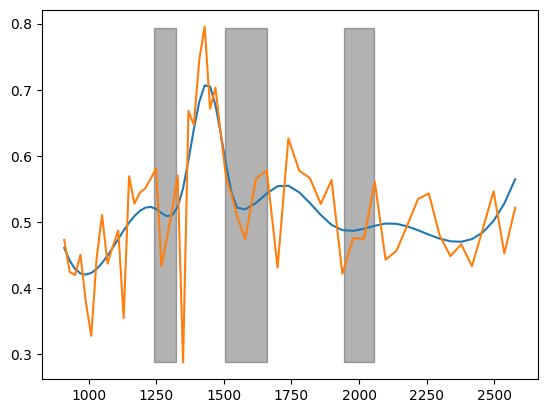

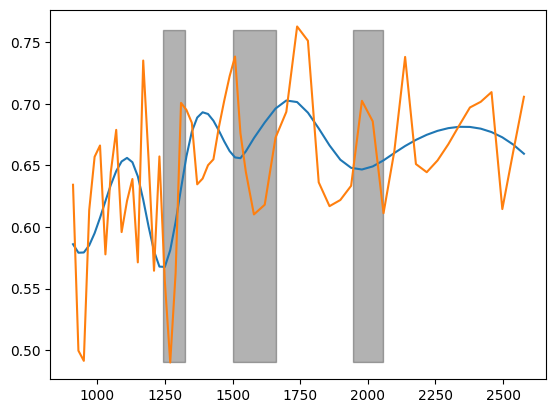

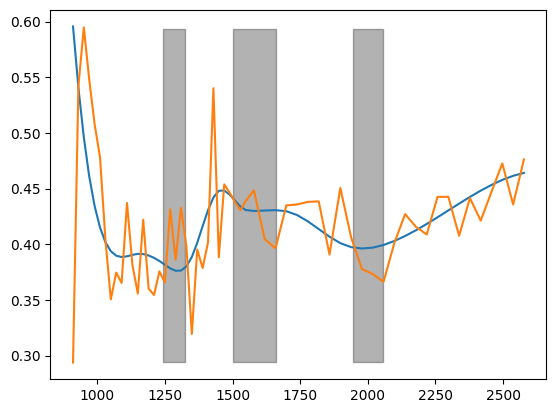

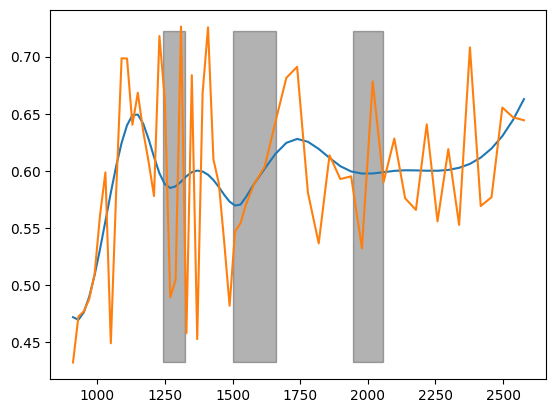

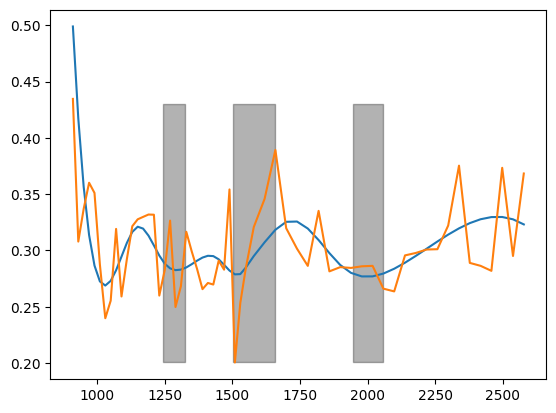

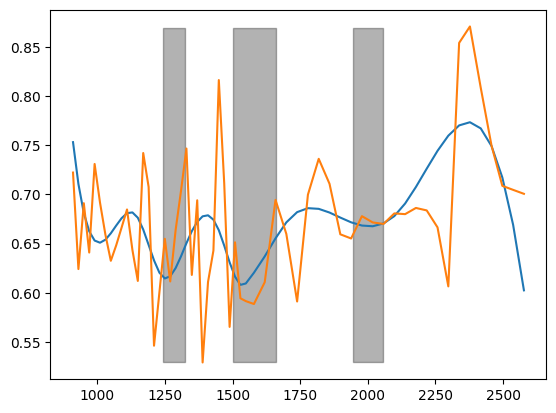

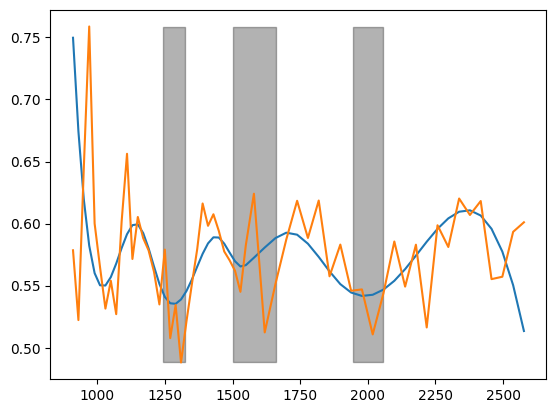

In [41]:
test_im = tf.imread(f'D:/Data/Ice_Pipeline_Out_6-2-23/rfl_smooth/{list(wloc_dict.keys())[1]}_smooth.tif')
test_im_corr = tf.imread(f'D:/Data/Ice_Pipeline_Out_6-2-23/rfl_correction/{list(wloc_dict.keys())[1]}_corrected.tif')
test_im_wloc = list(wloc_dict.values())[1]
df = pd.read_csv('D:/Data/Ice_Pipeline_Out_6-2-23/bandInfo.csv')
wvl = df.iloc[:,2]

random_inds = np.random.choice(np.array(test_im_wloc.index),15)
rand_x = np.array(test_im_wloc.loc[random_inds,'x']).astype(int)
rand_y = np.array(test_im_wloc.loc[random_inds,'y']).astype(int)

for x,y in zip(rand_x,rand_y):
    fig = plt.figure()
    plt.plot(wvl,test_im[x,y,:],label='Cubic Spline')
    plt.plot(wvl,test_im_corr[x,y,:],label='Li Correction')
    plt.fill_betweenx(np.arange(test_im_corr[x,y,:].min(),test_im_corr[x,y,:].max(),0.005),1242,1323,color='k',alpha=0.3)
    plt.fill_betweenx(np.arange(test_im_corr[x,y,:].min(),test_im_corr[x,y,:].max(),0.005),1503,1659,color='k',alpha=0.3)
    plt.fill_betweenx(np.arange(test_im_corr[x,y,:].min(),test_im_corr[x,y,:].max(),0.005),1945,2056,color='k',alpha=0.3)

Random Index: 80
Random Band: 50
Number of 0's: 0


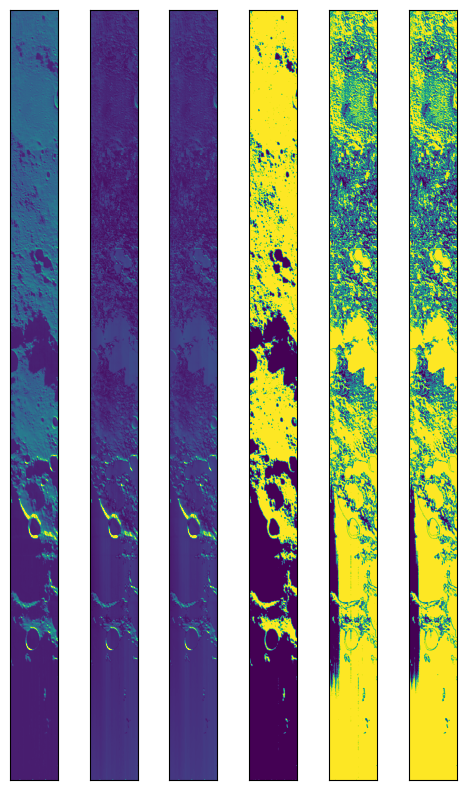

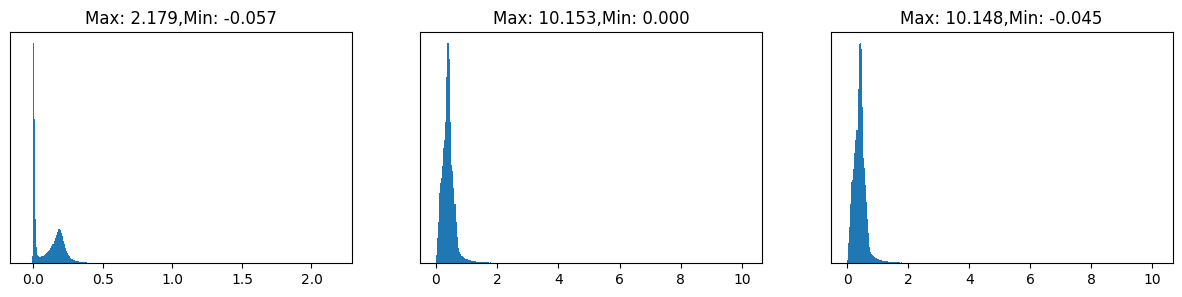

In [154]:
import copy
ice_pipe_folder = 'D:/Data/Ice_Pipeline_Out_6-2-23'

og_folder = path.join(ice_pipe_folder,'rfl_cropped')
corrected_folder = path.join(ice_pipe_folder,'rfl_correction')
smooth_folder = path.join(ice_pipe_folder,'rfl_smooth')

og_filenames = os.listdir(og_folder)
corrected_filenames = os.listdir(corrected_folder)
smooth_filenames = os.listdir(smooth_folder)

random_index = np.random.choice(len(og_filenames))
print (f'Random Index: {random_index}')
og_test = tf.imread(path.join(og_folder,og_filenames[random_index]))
corrected_test = tf.imread(path.join(corrected_folder,corrected_filenames[random_index]))
smooth_test = tf.imread(path.join(smooth_folder,smooth_filenames[random_index]))

random_band = np.random.choice(og_test.shape[2])
print (f'Random Band: {random_band}')
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(6,10))
ax1.set_yticks([]),ax2.set_yticks([]),ax3.set_yticks([]),ax4.set_yticks([]),ax5.set_yticks([]),ax6.set_yticks([])
ax1.set_xticks([]),ax2.set_xticks([]),ax3.set_xticks([]),ax4.set_xticks([]),ax5.set_xticks([]),ax6.set_xticks([])

ax1.imshow(og_test[:,:,random_band],vmax=0.3*og_test[:,:,random_band].max())
ax2.imshow(corrected_test[:,:,random_band],vmax=0.3*corrected_test[:,:,random_band].max())
ax3.imshow(smooth_test[:,:,random_band],vmax=0.3*smooth_test[:,:,random_band].max())

def get_bright(image,thresh):
    bright_img = copy.copy(image)
    bright_img[np.where(bright_img<thresh)]=0
    bright_img[np.where(bright_img>thresh)]=1
    return bright_img

og_bright = get_bright(og_test,0.05)
corrected_bright = get_bright(corrected_test,0.3)
smooth_bright = get_bright(smooth_test,0.3)

ax4.imshow(og_bright[:,:,random_band])
ax5.imshow(corrected_bright[:,:,random_band])
ax6.imshow(smooth_bright[:,:,random_band])

def get_histogram(image1,image2,image3):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,3))
    ax1.set_yticks([]),ax2.set_yticks([]),ax3.set_yticks([])
    ax1.hist(image1[:,:,random_band].flatten(),300)
    ax1.set_title(f'Max: {image1[:,:,random_band].max():.3f},Min: {image1[:,:,random_band].min():.3f}')
    ax2.hist(image2[:,:,random_band].flatten(),300)
    ax2.set_title(f'Max: {image2[:,:,random_band].max():.3f},Min: {image2[:,:,random_band].min():.3f}')
    ax3.hist(image3[:,:,random_band].flatten(),300)
    ax3.set_title(f'Max: {image3[:,:,random_band].max():.3f},Min: {image3[:,:,random_band].min():.3f}')
    
get_histogram(og_test,corrected_test,smooth_test)

print(f'Number of 0\'s: {np.count_nonzero(og_test[:,:,random_band]==0)}')

In [7]:
ice_pipe_folder = 'D:/Data/Ice_Pipeline_Out_6-8-23'
smooth_folder = path.join(ice_pipe_folder,'rfl_smooth')

in_dict = {}
prog,tot = 1,len(os.listdir(smooth_folder))
for file in os.listdir(smooth_folder):
    im = tf.imread(path.join(smooth_folder,file))
    in_dict.update({file[:-11]:im})
    print (f'\r{prog} of {tot} ({prog/tot:.1%})',end='\r')
    prog+=1

In [14]:
import Locate_Ice_Mosaic
from importlib import reload
reload(Locate_Ice_Mosaic)
from Locate_Ice_Mosaic import M3_Mosaic

def load_tifs(pathList:list)->list:
    tif_list = []
    prog,tot = 1,len(pathList)
    for path in pathList:
        tif_list.append(tf.imread(path))
        #print (f'\r{prog} of {tot} retrived. ({prog/tot:.0%})',end='\r')
        prog+=1
    return tif_list

print ('Select Analysis Folder:')
folderPath = 'D:/Data/Ice_Pipeline_Out_6-8-23'
all_rfl_paths = [os.path.join(folderPath,'rfl_cropped',i) for i in os.listdir(os.path.join(folderPath,'rfl_cropped'))]
all_loc_paths = [os.path.join(folderPath,'loc_cropped',i) for i in os.listdir(os.path.join(folderPath,'loc_cropped'))]
all_obs_paths = [os.path.join(folderPath,'obs_cropped',i) for i in os.listdir(os.path.join(folderPath,'obs_cropped'))]

with open(os.path.join(folderPath,'stampNames.txt')) as f:
    all_names = f.readlines()
all_names = [i[:-2] for i in all_names]

def batch_list(input,n):
    return [input[i:i+n] for i in range(0,len(input),n)]

N = 5
batch_rfl_paths = batch_list(all_rfl_paths,N)
batch_loc_paths = batch_list(all_loc_paths,N)
batch_obs_paths = batch_list(all_obs_paths,N)
all_names_split = batch_list(all_names,N)
batch_keys = batch_list(tuple(in_dict.keys()),N)
batch_vals = batch_list(tuple(in_dict.values()),N)

prog,tot=0,len(all_rfl_paths)
for n in range(len(batch_rfl_paths)):
    #print ('Retrieving RFL Tifs...')
    batch_rfl = load_tifs(batch_rfl_paths[n])
    #print ('\nRetrieving LOC Tifs...')
    batch_loc = load_tifs(batch_loc_paths[n])
    #print ('\nRetrieving OBS Tifs...')
    batch_obs = load_tifs(batch_obs_paths[n])
    batch_names = all_names_split[n]

    batch_dict = {key:val for key,val in zip(batch_keys[n],batch_vals[n])}
    
    batchMosaic = M3_Mosaic(batch_rfl,batch_loc,batch_obs,batch_names,folderPath)
    prog = prog+len(batchMosaic.stampNames)
    print (f'\n-----Beginning Mosaic analysis of {len(batchMosaic.stampNames)} ({prog} of {tot})images-----')
    print(f'Currently processing: {list(batch_dict.keys())}')
    print ('Mapping Spectral Angle of all ice-positive pixels...')
    specAngleMap_dict,ThreshMap_dict = batchMosaic.spectral_angle_mapping(threshold=30,inputImageDictionary=batch_dict)

    print ('\nRemoval from memory...')
    del batch_rfl,batch_loc,batch_obs

Select Analysis Folder:

-----Beginning Mosaic analysis of 5 (5 of 99)images-----
Currently processing: ['20090520t065048', '20090528t083319', '20090529t013507', '20090529t100749', '20090529t183825']
Mapping Spectral Angle of all ice-positive pixels...
5 of 5 (100.0%)
Removal from memory...

-----Beginning Mosaic analysis of 5 (10 of 99)images-----
Currently processing: ['20090530t030925', '20090530t201123', '20090531t172712', '20090601t061442', '20090602t074711']
Mapping Spectral Angle of all ice-positive pixels...
5 of 5 (100.0%)
Removal from memory...

-----Beginning Mosaic analysis of 5 (15 of 99)images-----
Currently processing: ['20090602t203342', '20090603t050442', '20090603t174502', '20090604t104552', '20090604t191631']
Mapping Spectral Angle of all ice-positive pixels...
5 of 5 (100.0%)
Removal from memory...

-----Beginning Mosaic analysis of 5 (20 of 99)images-----
Currently processing: ['20090605t034701', '20090605t163232', '20090605t163636', '20090606t010302', '20090606t09

In [16]:
##Saves color mapped spectral angle map
import copy
import warnings
warnings.filterwarnings("ignore",category=rio.errors.NotGeoreferencedWarning)
def find_all(s,c):
    return [n for n,i in enumerate(s) if i==c]

def save_spectral_angle_map(spec_angle_folder_path:str):
    try:
        os.mkdir(path.join(spec_angle_folder_path,'cmap_tifs'))
    except:
        pass
    try:
        os.mkdir(path.join(spec_angle_folder_path,'positive_detections'))
    except:
        pass

    all_detections_array = np.zeros((0,5))
    file_list = [i for i in os.listdir(spec_angle_folder_path) if path.isfile(path.join(spec_angle_folder_path,i))==True]
    prog,tot = 1,len(file_list)
    for sam in file_list:
        specAngleMap = tf.imread(path.join(spec_angle_folder_path,sam))
        specAngleMap = specAngleMap.astype('float32')
        loc_backplane = tf.imread(path.join(path.dirname(spec_angle_folder_path),'loc_cropped',f'm3g{sam[:-8]}_loc_cropped.tif'))
        wloc_df = pd.read_csv(path.join(path.dirname(spec_angle_folder_path),'water_locations',f'{sam[:-8]}.csv'))

        tot_size = specAngleMap.shape[0]*specAngleMap.shape[1]
        #print (specAngleMap.shape)
        #print (specAngleMap.min(),specAngleMap.max())
        water_x,water_y = (np.array(wloc_df.iloc[:,4:]).T.astype(int))
        water_bool = np.zeros(specAngleMap.shape)
        water_bool[water_x,water_y] = 1

        saveIm = copy.copy(specAngleMap)
        THRESH_UINT8 = 30
        saveIm_min = saveIm.min()
        saveIm = saveIm - saveIm_min
        THRESH_UINT8 = THRESH_UINT8-saveIm_min
        #print (f'After Subtracting min: {THRESH_UINT8}')
        saveIm_max = saveIm.max()
        saveIm,THRESH_UINT8 = (255*saveIm / saveIm_max,255*THRESH_UINT8 / saveIm_max)
        #print (f'After Dividing: {THRESH_UINT8}')
        saveIm,THRESH_UINT8 = saveIm.astype('uint8'),np.uint8(THRESH_UINT8)
        #print (THRESH_UINT8)
        #print (f'Threshold value in 8-bit integer: {THRESH_UINT8}')
        saveIm[np.where(saveIm>THRESH_UINT8)] = np.uint8(255)
        spec_angle_positive_num = np.count_nonzero(saveIm!=np.uint8(255))
        saveIm[np.where(water_bool==0)] = np.uint8(255)
        water_loc_num = np.count_nonzero(saveIm!=np.uint8(255))

        #print (f'Positive Detections from Spectral Angle Alone: {spec_angle_positive_num} ({spec_angle_positive_num/tot_size:.2%})\n'\
            # f'Positive Detections from Spectral Angle and Absorption Locations: {water_loc_num} ({water_loc_num/tot_size:.2%})\n'\
            #     f'Difference: {np.abs(water_loc_num-spec_angle_positive_num)}')

        detection_bool_array = np.zeros(saveIm.shape)
        detection_bool_array[np.where(saveIm!=255)] = 1
        x,y = (np.where(detection_bool_array==1))
        detection_long,detection_lat = (np.array(loc_backplane[np.where(detection_bool_array==1)])[:,0:2].T)
        df = pd.DataFrame({'Latitude':detection_lat,'Longitude':detection_long,'x':x,'y':y})
        df.to_csv(path.join(spec_angle_folder_path,'positive_detections',f'{sam[:-8]}_pos_detect.csv'))
        all_detections_array = np.concatenate([all_detections_array,np.array((detection_lat,detection_long,x,y,[prog]*len(detection_lat))).T])

        tf.imwrite(path.join(spec_angle_folder_path,'positive_detections',f'{sam[:-8]}_pos_detect_boolArray.tif'),detection_bool_array.astype('float32'))

        def get_cmap_dict(_min:int,_max:int)->dict:
            cmap_dict = {}
            cmap_indexes = [i for i in range(0,256)]
            cmap_raw = plt.get_cmap('hot')
            norm = plt.Normalize(_min,_max)
            for key,index in zip(range(0,256),cmap_indexes):
                c = 255*np.array(cmap_raw(norm(index)))
                cmap_dict[key] = tuple(c.astype('uint8'))
            return cmap_dict

        colormap_dict = get_cmap_dict(0,255)

        with rio.Env():
            with rio.open(path.join(spec_angle_folder_path,'cmap_tifs',f'{sam[:-8]}_SAM_cmap'),'w',driver='GTiff',
                        height = saveIm.shape[0],width=saveIm.shape[1],
                        count=1,
                        dtype=saveIm.dtype,nodata=np.uint8(255)) as f:
                f.write(saveIm,indexes=1)
                f.write_colormap(1, colormap_dict)
                #print (f'Shape: {f.shape}')
                cmap = f.colormap(1)
                #print (cmap)
        
        print (f'\r{prog} of {tot} ({prog/tot:.1%})',end='\r')
        prog+=1
    
    print ('Success!')
    return all_detections_array

all_detections_array = save_spectral_angle_map('D:/Data/Ice_Pipeline_Out_6-8-23/spectral_angle_maps')

Success! (100.0%)


In [17]:
print (all_detections_array.shape)
df = pd.DataFrame(all_detections_array)
df.columns = ['Latitude','Longitude','x','y','Stamp_Num']
df.to_csv('D:/Data/Ice_Pipeline_Out_6-8-23/all_detections.csv')

(20071, 5)


In [39]:
with open('D:/Data/SP_IceLoc_280m.txt','r') as f:
    lines= f.readlines()

lines = [i[:-1] for i in lines]
lines = [i.split('\t') for i in lines]
arr = np.array(lines).astype('float32')
print (arr)
print (arr.shape)

[[-383180.    -14651.  ]
 [-357540.8   -22821.75]
 [-357540.8   -24230.5 ]
 ...
 [ 335846.    228499.2 ]
 [ 337254.8   218356.2 ]
 [ 338381.8   220892.  ]]
(1119, 2)


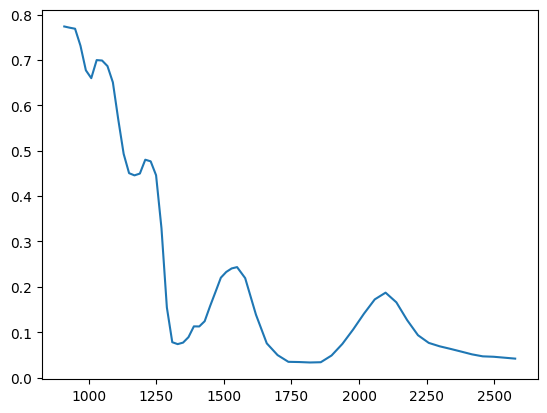

In [41]:
from get_USGS_H2OFrost import get_USGS_H2OFrost
_wvl,M = get_USGS_H2OFrost('D:/Data/USGS_Water_Ice')
df = pd.read_csv('D:/Data/Ice_Pipeline_Out_5-23-23/bandInfo.csv')
wvl = df.iloc[:,2]
plt.plot(wvl,M)

(59, 4814, 304)


C:\Users\zvig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rasterio\__init__.py:331: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Shape: (4814, 304)


ValueError: NULL color table

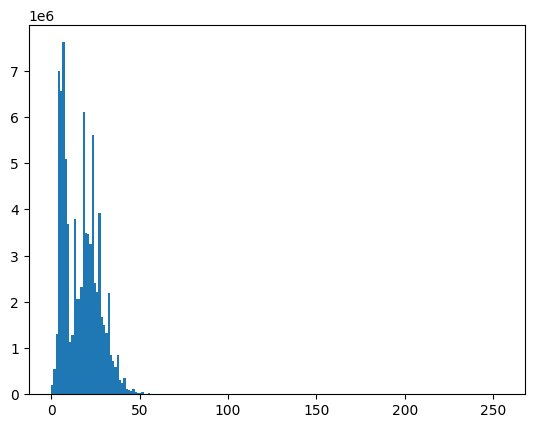

In [16]:
import matplotlib.cm as cm
test_im_path = 'D:/Data/Ice_Pipeline_Out_6-2-23/rfl_cropped/m3g20090528t083319_rfl_cropped.tif'
test_im=tf.imread(test_im_path)
test_im = np.moveaxis(test_im,2,0)
test_im = test_im.astype('float32')
for i in range(test_im.shape[0]):
    test_im[i,:,:] = test_im[i,:,:]-test_im[i,:,:].min()
    test_im[i,:,:] = 255*test_im[i,:,:]/test_im[i,:,:].max()
test_im = test_im.astype('uint8')

print (test_im.shape)
plt.hist(test_im.flatten(),200)

def get_cmap_dict(_min:int,_max:int)->dict:
    cmap_dict = {}
    cmap_indexes = [i for i in range(0,256)]
    cmap_raw = plt.get_cmap('viridis')
    norm = plt.Normalize(_min,_max)
    for key,index in zip(range(0,256),cmap_indexes):
        c = 255*np.array(cmap_raw(norm(index)))
        cmap_dict[key] = tuple(c.astype('uint8'))
    return cmap_dict

colormap_dict = get_cmap_dict(0,80)

with rio.open('D:/Data/Ice_Pipeline_Out_6-2-23/test_spec_angle.tif','w',
            driver='GTiff',
            height = test_im.shape[1],width=test_im.shape[2],
            count=test_im.shape[0],
            dtype=test_im.dtype) as f:

    f.profile['photometric'] = 'MINISBLACK'
    f.write(test_im)
    
    for i in range(1,test_im.shape[0]):
        f.write_colormap(i,colormap_dict)

    print (f'Shape: {f.shape}')
    cmap = f.colormap(1)
    print (cmap)

plt_im = tf.imread('D:/Data/Ice_Pipeline_Out_6-2-23/test_spec_angle.tif')
print(f'Min/Max: {plt_im.min()},{plt_im.max()}')

In [170]:
import matplotlib.cm as cm
def get_cmap_dict(_min:int,_max:int)->dict:
    cmap_dict = {}
    cmap_indexes = [i for i in range(0,256)]
    cmap_raw = plt.get_cmap('viridis')
    norm = plt.Normalize(_min,_max)
    for key,index in zip(range(0,256),cmap_indexes):
        c = 255*np.array(cmap_raw(norm(index)))
        cmap_dict[key] = tuple(c.astype('uint8'))
    return cmap_dict

cmap1 = get_cmap_dict(0,20)
cmap2 = get_cmap_dict(0,255)
print (cmap1)
print (cmap2)

{0: (68, 1, 84, 255), 1: (71, 18, 101, 255), 2: (72, 35, 116, 255), 3: (69, 52, 127, 255), 4: (64, 67, 135, 255), 5: (58, 82, 139, 255), 6: (52, 94, 141, 255), 7: (46, 107, 142, 255), 8: (41, 120, 142, 255), 9: (36, 132, 141, 255), 10: (32, 144, 140, 255), 11: (30, 155, 137, 255), 12: (34, 167, 132, 255), 13: (47, 179, 123, 255), 14: (68, 190, 112, 255), 15: (94, 201, 97, 255), 16: (121, 209, 81, 255), 17: (154, 216, 60, 255), 18: (189, 222, 38, 255), 19: (223, 227, 24, 255), 20: (253, 231, 36, 255), 21: (253, 231, 36, 255), 22: (253, 231, 36, 255), 23: (253, 231, 36, 255), 24: (253, 231, 36, 255), 25: (253, 231, 36, 255), 26: (253, 231, 36, 255), 27: (253, 231, 36, 255), 28: (253, 231, 36, 255), 29: (253, 231, 36, 255), 30: (253, 231, 36, 255), 31: (253, 231, 36, 255), 32: (253, 231, 36, 255), 33: (253, 231, 36, 255), 34: (253, 231, 36, 255), 35: (253, 231, 36, 255), 36: (253, 231, 36, 255), 37: (253, 231, 36, 255), 38: (253, 231, 36, 255), 39: (253, 231, 36, 255), 40: (253, 231, 36, 

In [21]:
raw_images = [tf.imread(path.join('D:/Data/Ice_Pipeline_Out_6-8-23/rfl_cropped',i)) for i in os.listdir('D:/Data/Ice_Pipeline_Out_6-8-23/rfl_cropped')]

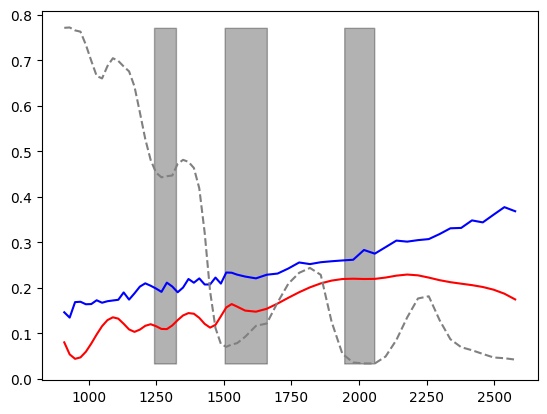

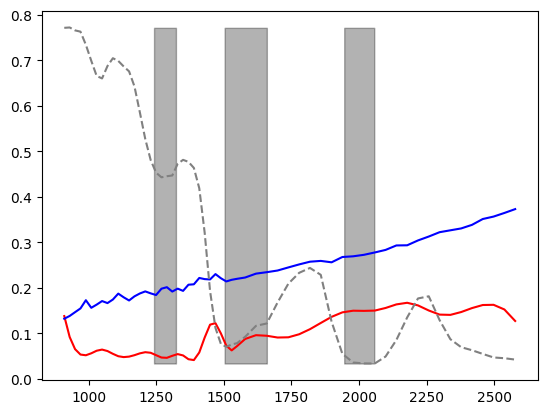

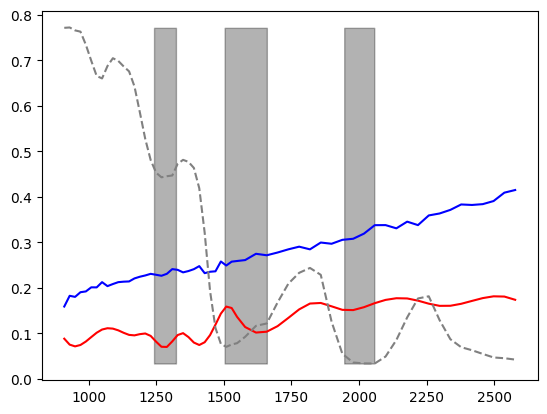

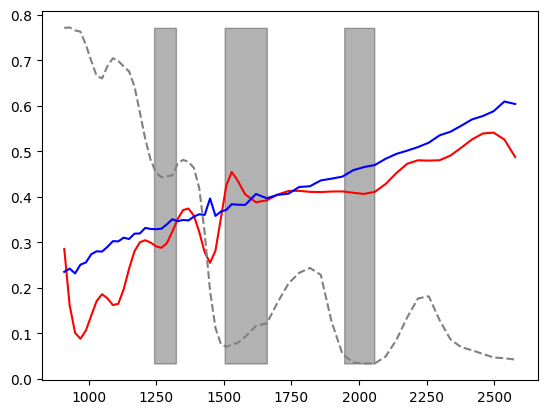

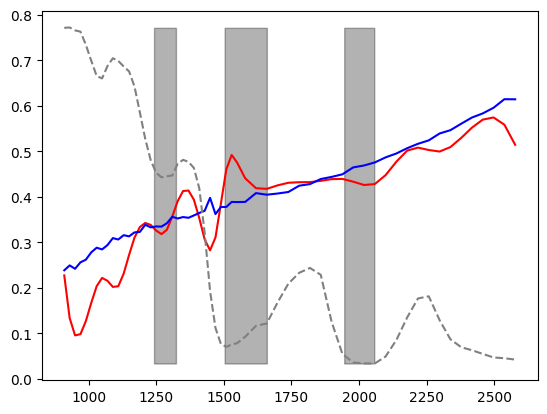

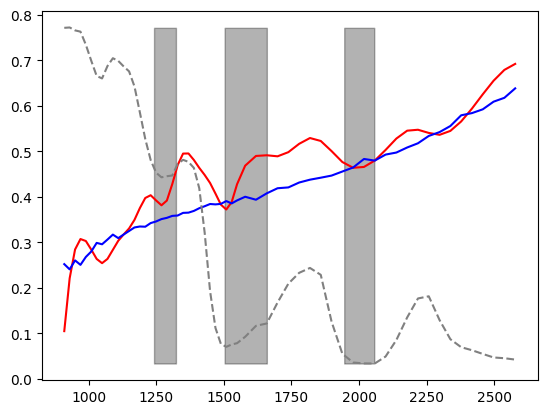

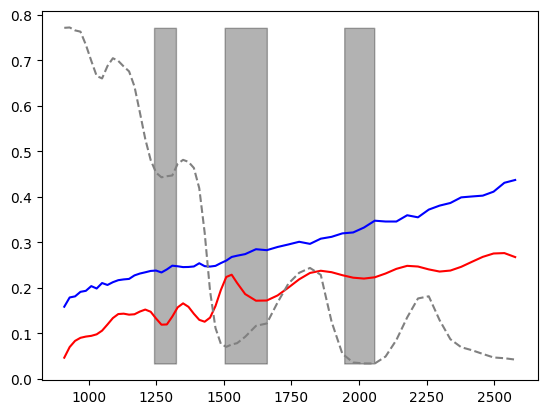

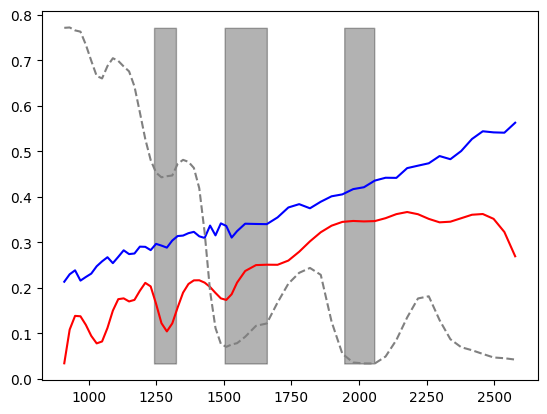

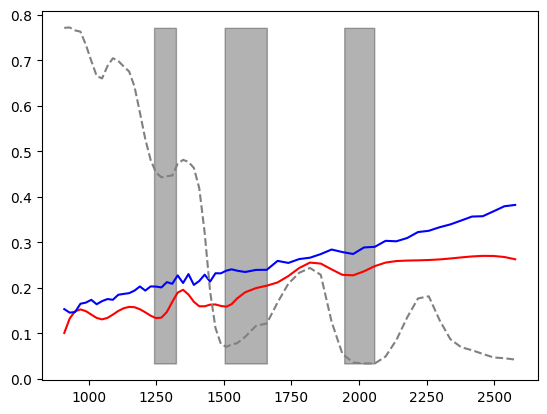

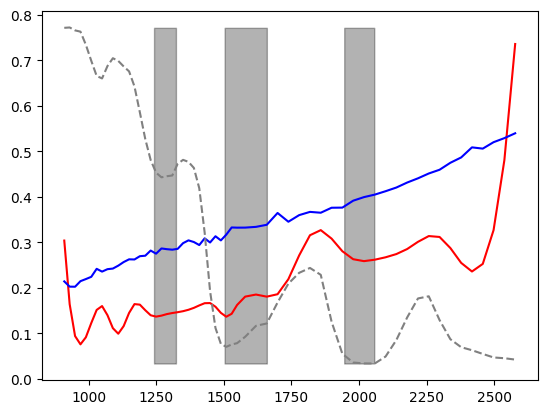

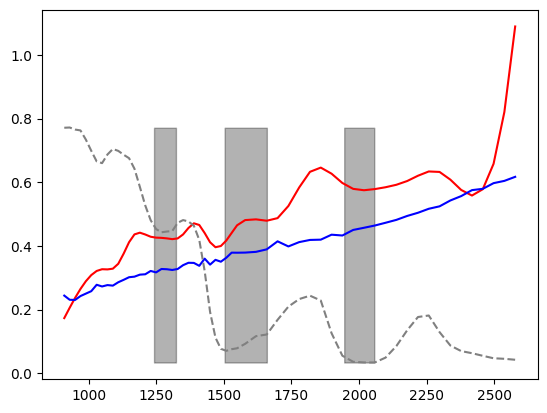

In [22]:
import pandas as pd
import os
from os import path
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt
from get_USGS_H2OFrost import get_USGS_H2OFrost
water_detections = pd.read_csv('D:/Data/Ice_Pipeline_Out_6-8-23/all_detections.csv')

wvl = pd.read_csv('D:/Data/Ice_Pipeline_Out_5-23-23/bandInfo.csv').iloc[:,2]
_wvl,usgs_spec = get_USGS_H2OFrost('D:/Data/USGS_Water_Ice',wvl/1000)
smooth_images = list(in_dict.values())

stamp_names = list(in_dict.keys())
prog=0
for x,y,num in zip(*(np.array(water_detections.iloc[:,-3:]).astype(int).T)):
    print (f'\r{x},{y},{num}',end='\r')
    stamp_name = stamp_names[num-1]
    rfl_smooth = smooth_images[num-1][x,y,:]
    rfl_raw = raw_images[num-1][x,y,:]
    fig = plt.figure()
    plt.plot(wvl,rfl_smooth,color='red',label='Cubic Spline and Corrected')
    plt.plot(wvl,rfl_raw,color='blue',label='Raw Signal')
    plt.plot(wvl,usgs_spec,ls='--',color='gray')
    plt.fill_betweenx(np.arange(usgs_spec.min(),usgs_spec.max(),0.001),1242,1323,color='k',alpha=0.3)
    plt.fill_betweenx(np.arange(usgs_spec.min(),usgs_spec.max(),0.001),1503,1659,color='k',alpha=0.3)
    plt.fill_betweenx(np.arange(usgs_spec.min(),usgs_spec.max(),0.001),1945,2056,color='k',alpha=0.3)
    plt.savefig(path.join('D:/Data/Ice_Pipeline_Out_6-2-23/all_water_spectra',f'{stamp_name}_{x}_{y}'))
    if prog==10:
        break
    prog+=1